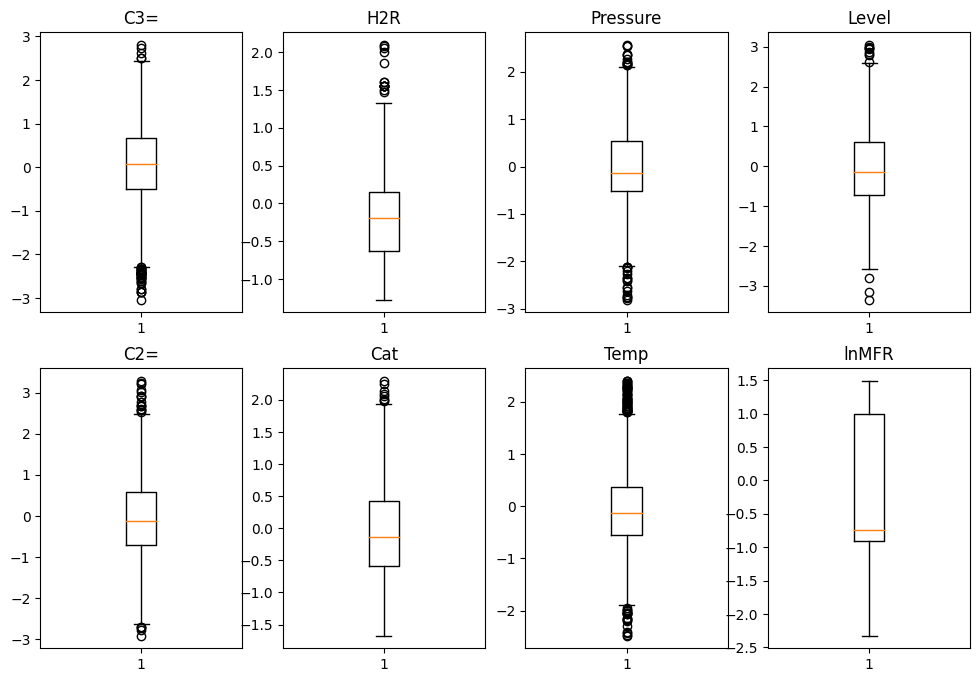

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###################
# Load data
url = 'https://raw.githubusercontent.com/irakli97/MFR_Prediction/main/mfr.csv'
df = pd.read_csv(url)
df.columns = ['Time','C3=','H2R','Pressure','Level','C2=','Cat','Temp','MFR']
del df['Time']
df.describe()

###################
# remove missing values
df = df.dropna().reset_index(drop=True) # drop any row with NaN


###################
# MFR to LNMFR
target = 'lnMFR'
df['lnMFR'] = np.log(df['MFR'].values)
del df['MFR']


###################
# Standardize data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.describe()

###################
# Remove outliers using Modified Z-score
def modified_z_score(data):
    median = data.median()
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

modified_z_scores = df.apply(modified_z_score)
df = df[(np.abs(modified_z_scores) < 3.5).all(axis=1)]

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
for i,c in enumerate(df.columns):
    if i<=7:
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(df[c])
plt.show()

###################
# train test split
features = df.columns.drop(target)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)



In [2]:
len(df)

2221

In [ ]:
# LREG
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
model = Lasso()

# Define the parameters for grid search
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Define the grid search using 5-fold cross validation
grid = GridSearchCV(model, parameters, cv=5)

# Fit the model to the training data and find the best parameters
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Print the best parameters
print(f'Best parameters: {grid.best_params_}')

# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model using RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate the model using MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {rmse_train}, MAE: {mae_train}, R-squared: {r2_train}')
print(f'Test RMSE: {rmse_test}, MAE: {mae_test}, R-squared: {r2_test}')


Best parameters: {'alpha': 0.0001}
Training RMSE: 0.623680904980068, MAE: 0.49971954571324034, R-squared: 0.5761941364521763
Test RMSE: 0.6377348079681763, MAE: 0.5138469609816961, R-squared: 0.5706071995090883


In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
model = RandomForestRegressor()

# Define the parameters for grid search
parameters = {'n_estimators': [10, 20, 40, 80, 160, 320], 'max_depth': [None, 10, 20, 40, 80, 160]}

# Define the grid search using 5-fold cross validation
grid = GridSearchCV(model, parameters, cv=5, n_jobs=-1)

# Fit the model to the training data and find the best parameters
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Print the best parameters
print(f'Best parameters: {grid.best_params_}')

# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model using RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate the model using MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {rmse_train}, MAE: {mae_train}, R-squared: {r2_train}')
print(f'Test RMSE: {rmse_test}, MAE: {mae_test}, R-squared: {r2_test}')


Best parameters: {'max_depth': 40, 'n_estimators': 80}
Training RMSE: 0.16005331432537212, MAE: 0.09705052869044928, R-squared: 0.9720892562537714
Test RMSE: 0.43418991631346426, MAE: 0.26083335479783587, R-squared: 0.8009629247554348


In [ ]:
# xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
model = xgb.XGBRegressor()

# Define the parameters for grid search
parameters = {'n_estimators': [10, 20, 40, 80, 160, 320], 'max_depth': [2, 3, 5, 10], 'learning_rate': [0.01, 0.1]}

# Define the grid search using 5-fold cross validation
grid = GridSearchCV(model, parameters, cv=5)

# Fit the model to the training data and find the best parameters
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Print the best parameters
print(f'Best parameters: {grid.best_params_}')

# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model using RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate the model using MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {rmse_train}, MAE: {mae_train}, R-squared: {r2_train}')
print(f'Test RMSE: {rmse_test}, MAE: {mae_test}, R-squared: {r2_test}')


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 160}
Training RMSE: 0.17091900608124488, MAE: 0.11624504234371537, R-squared: 0.968171015466244
Test RMSE: 0.43984790088591463, MAE: 0.2782737828308878, R-squared: 0.7957417708194161


In [ ]:
# ANN
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from copy import deepcopy
import numpy as np

# Function to calculate R-squared
def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# Function to calculate RMSE
def rmse_score(y_true, y_pred):
    mse = torch.mean((y_true - y_pred) ** 2)
    return torch.sqrt(mse)

# Function to calculate MAE
def mae_score(y_true, y_pred):
    mae = torch.mean(torch.abs(y_true - y_pred))
    return mae

# Split the data into train, validation, and test sets
X_trainval, X_test, y_trainval, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

# Create a TensorDataset from the tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define a DataLoader
train_loader = DataLoader(train_dataset, batch_size=16)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

# Define the model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)

# Define the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Initialize variables for early stopping
best_loss = np.inf
epochs_no_improve = 0
n_epochs_stop = 10

# Training loop with early stopping
for epoch in range(100):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)
        loss = criterion(y_pred.squeeze(), y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # After each epoch, check the loss on the validation set
    model.eval()
    with torch.no_grad():
        val_losses = []
        for X_batch_val, y_batch_val in val_loader:
            y_pred_val = model(X_batch_val)
            val_loss = criterion(y_pred_val.squeeze(), y_batch_val)
            val_losses.append(val_loss.item())

    val_loss_mean = np.mean(val_losses)

    # If the validation loss is lower than our best loss,
    # we save the model state and print the new best loss
    if val_loss_mean < best_loss:
        best_loss = val_loss_mean
        best_model_state = deepcopy(model.state_dict())
        print(f'New best validation loss: {best_loss}')

    # If the validation loss hasn't improved for n_epochs_stop epochs,
    # we stop the training and load the best model state
    else:
        epochs_no_improve += 1
        if epochs_no_improve == n_epochs_stop:
            print('Early stopping!')
            model.load_state_dict(best_model_state)
            break

# Evaluation on training set
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train_tensor)
    r2_train = r2_score(y_train_tensor, y_train_pred.squeeze())
    rmse_train = rmse_score(y_train_tensor, y_train_pred.squeeze())
    mae_train = mae_score(y_train_tensor, y_train_pred.squeeze())

# Evaluation on test set
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    r2_test = r2_score(y_test_tensor, y_test_pred.squeeze())
    rmse_test = rmse_score(y_test_tensor, y_test_pred.squeeze())
    mae_test = mae_score(y_test_tensor, y_test_pred.squeeze())

print(f'RMSE: {rmse_train.item()}, MAE: {mae_train.item()}, Training R²: {r2_train.item()}')
print(f'RMSE: {rmse_test.item()}, MAE: {mae_test.item()}, Test R²: {r2_test.item()}')


New best validation loss: 0.4656410211963313
New best validation loss: 0.36868193692394663
New best validation loss: 0.3234233073890209
New best validation loss: 0.30108639251972946
New best validation loss: 0.2890743972467525
New best validation loss: 0.27998758134032997
New best validation loss: 0.2739019883530481
New best validation loss: 0.2674220611474344
New best validation loss: 0.2621817308078919
New best validation loss: 0.2578991615612592
New best validation loss: 0.2555460955149361
New best validation loss: 0.2532535469425576
New best validation loss: 0.25131342307265314
New best validation loss: 0.2506877664210541
New best validation loss: 0.2493367815124137
New best validation loss: 0.2487605180857437
New best validation loss: 0.24807997460344008
New best validation loss: 0.24764650434787785
New best validation loss: 0.24721894240272896
New best validation loss: 0.24692810473165341
New best validation loss: 0.24633668163525207
New best validation loss: 0.24584499580253447


In [ ]:
# SVM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define the model
model = SVR()

# Define the parameters for grid search
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5]}

# Define the grid search using 5-fold cross validation
grid = GridSearchCV(model, parameters, cv=5)

# Fit the model to the training data and find the best parameters
grid.fit(X_train, y_train)

# Get the best model
best_model = grid.best_estimator_

# Print the best parameters
print(f'Best parameters: {grid.best_params_}')

# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model using RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate the model using MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Evaluate the model using R-squared
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {rmse_train}, MAE: {mae_train}, R-squared: {r2_train}')
print(f'Test RMSE: {rmse_test}, MAE: {mae_test}, R-squared: {r2_test}')


Best parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Training RMSE: 0.38480758790490577, MAE: 0.2506813809857494, R-squared: 0.8382772056641542
Test RMSE: 0.48889568087500185, MAE: 0.3163009868728656, R-squared: 0.747647904088281
